In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import t
from sklearn.linear_model import LinearRegression

# Enter 2 columns of B (before), A (after)
dt = {'B': [25,25,27,44,30,67,53,53,52,60,28], 
      'A': [27,29,37,56,46,82,57,80,61,59,43]}

df = pd.DataFrame(dt)

df['D'] = df.apply(lambda X: X['A'] - X['B'], axis=1)
df

,B,A,D
0,25,27,2
1,25,29,4
2,27,37,10
3,44,56,12
4,30,46,16
5,67,82,15
6,53,57,4
7,53,80,27
8,52,61,9
9,60,59,-1


In [2]:
# The mean of D is normally distributed, hence
mean = df['D'].mean()
std_mean = df['D'].std() / (len(df))**0.5
round(mean, 3), round(std_mean, 3)

(10.273, 2.405)

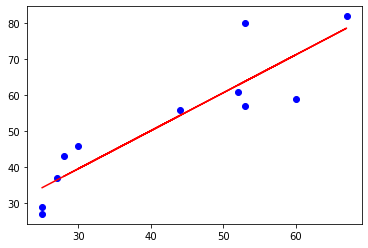

In [3]:
model = LinearRegression()
model.fit(df['B'].values.reshape(-1,1), df['A'].values.reshape(-1,1))
Y = model.predict(df.B.values.reshape(-1,1))

plt.scatter(df.B, df.A, color='b')
plt.plot(df.B, Y, color='r');

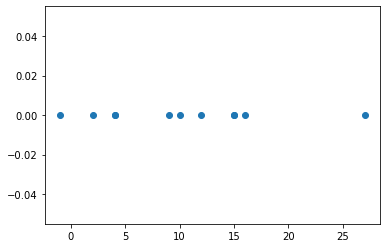

In [4]:
plt.scatter(df.D, [0]*len(df));

In [5]:
# Set significant level alpha, degree of freedoms, one tail or two tails.
alpha, ddof = 0.005, len(df) - 1
two_tails = False

# Compute the t statistic value
if two_tails:
    t_alpha = t.ppf(1 - alpha/2, ddof) 
else:
    t_alpha = t.ppf(1 - alpha, ddof) 

round(t_alpha, 3)

3.169

In [6]:
ci = (mean - t_alpha * std_mean, mean + t_alpha * std_mean)
round(ci[0], 3), round(ci[1], 3)

(2.651, 17.894)

In [7]:
# Asumme H0 is true, then D = 0, hence the t statistic:
t_null = mean / std_mean
round(t_null, 3)

4.272

In [8]:
# Evaluate the rejection of H0
if t_null > t_alpha:
    print('The test statistic is way extreme. H0 should be rejected!')
else:
    print('The test statistic is normal. H0 cannot be rejected!')

The test statistic is way extreme. H0 should be rejected!


In [9]:
p_value = 1 - t.cdf(t_null, ddof)

if two_tails:
    print(round(2 * p_value, 3))
else:
    print(round(p_value, 3))

0.001


In [10]:
# Other way to compute the p_value using the survival function of stats
p_value = t.sf(t_null, ddof)

if two_tails:
    print(round(2 * p_value, 3))
else:
    print(round(p_value, 3))
    

0.001
